Exercise 6

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

file_path = "OnlineRetail.csv"

unit_prices = []
country_prices = defaultdict(list)
customer_prices = defaultdict(list)
monthly_sales = defaultdict(float)
yearly_sales = defaultdict(float)

with open(file_path, newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        try:
            unit_price = float(row["UnitPrice"])
            quantity = int(row["Quantity"])
            unit_prices.append(unit_price)

            country_prices[row["Country"]].append(unit_price)
            if row["CustomerID"]:
                customer_prices[row["CustomerID"]].append(unit_price)
            date = datetime.strptime(row["InvoiceDate"], "%m/%d/%Y %H:%M")
            total_sale = unit_price * quantity
            monthly_sales[(date.year, date.month)] += total_sale
            yearly_sales[date.year] += total_sale

        except ValueError:
            continue



1. Find mean, std dev, min, max of unit price.

In [ ]:
mean_price = np.mean(unit_prices)
std_dev_price = np.std(unit_prices)
min_price = np.min(unit_prices)
max_price = np.max(unit_prices)
print(f"Mean Unit Price: {mean_price:.2f}")
print(f"Standard Deviation: {std_dev_price:.2f}")
print(f"Min Unit Price: {min_price:.2f}")
print(f"Max Unit Price: {max_price:.2f}")

Mean Unit Price: 4.61
Standard Deviation: 96.76
Min Unit Price: -11062.06
Max Unit Price: 38970.00


2. Draw histogram of unitprice field using matplotlib.

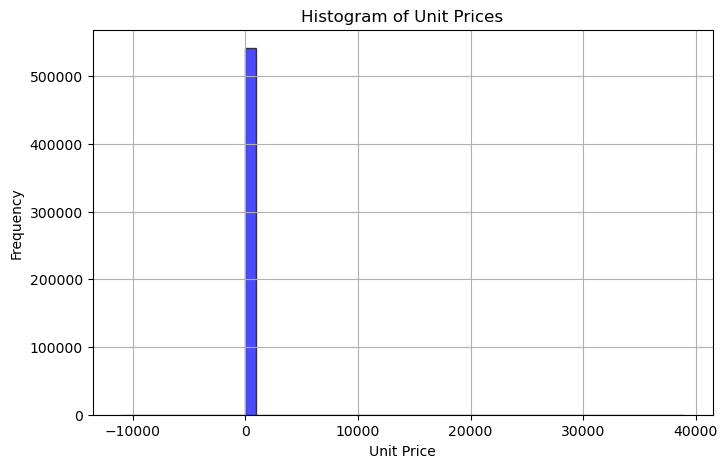

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(unit_prices, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Histogram of Unit Prices')
plt.grid(True)
plt.show()

3. Find mean of unitprice group by country and plot them.

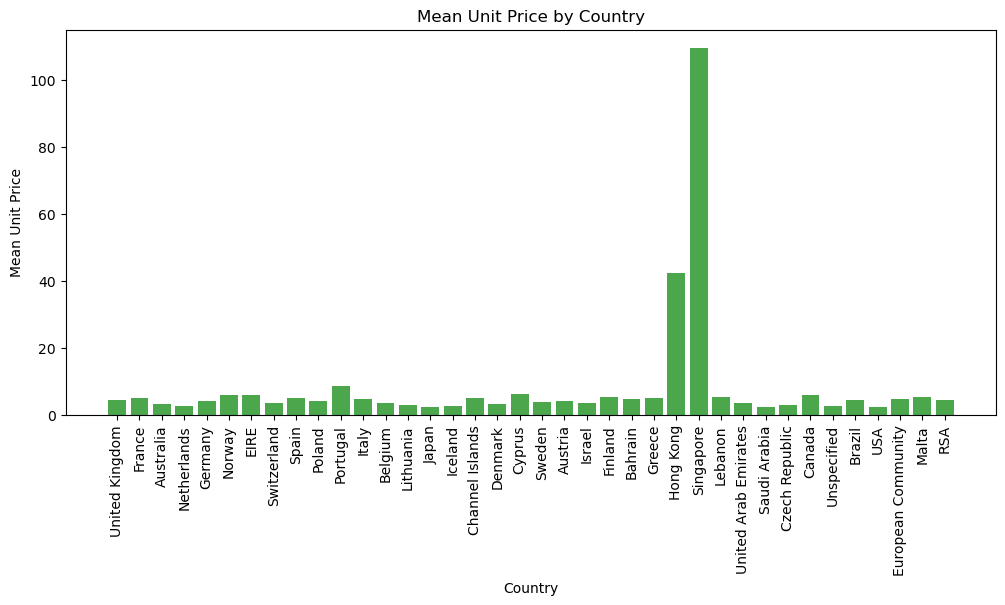

In [ ]:
mean_price_by_country = {country: np.mean(prices) for country, prices in country_prices.items()}
plt.figure(figsize=(12, 5))
plt.bar(mean_price_by_country.keys(), mean_price_by_country.values(), color='green', alpha=0.7)
plt.xlabel("Country")
plt.ylabel("Mean Unit Price")
plt.title("Mean Unit Price by Country")
plt.xticks(rotation=90)
plt.show()

4. Find min and max of unit price group by customerID.

In [ ]:
min_price_by_customer = {cust: np.min(prices) for cust, prices in customer_prices.items()}
max_price_by_customer = {cust: np.max(prices) for cust, prices in customer_prices.items()}

print("Min Price by CustomerID:", min_price_by_customer)
print("Max Price by CustomerID:", max_price_by_customer)


Min Price by CustomerID: {'17850': 1.06, '13047': 0.42, '12583': 0.06, '13748': 0.39, '15100': 10.95, '15291': 0.29, '14688': 0.19, '17809': 0.21, '15311': 0.12, '14527': 0.19, '16098': 0.29, '18074': 0.65, '17420': 1.25, '16029': 0.2, '16250': 0.42, '12431': 0.0, '17511': 0.1, '17548': 0.29, '13705': 0.65, '13747': 9.95, '13408': 0.29, '13767': 0.42, '17924': 0.29, '13448': 0.14, '15862': 0.16, '15513': 0.39, '12791': 1.85, '16218': 0.55, '14045': 1.65, '14307': 0.21, '17908': 0.12, '17920': 0.12, '12838': 0.29, '13255': 0.65, '16583': 1.25, '18085': 0.65, '13758': 0.21, '13694': 0.04, '15983': 0.42, '14849': 0.29, '17968': 0.29, '16210': 0.39, '17897': 0.29, '17377': 0.29, '16552': 0.29, '17181': 0.55, '17951': 0.29, '14729': 0.29, '12748': 0.0, '15012': 0.39, '12868': 0.29, '17572': 1.45, '14078': 0.39, '14001': 0.65, '12662': 0.21, '15525': 0.12, '14237': 0.85, '17905': 0.29, '15485': 0.42, '12433': 0.1, '16955': 0.85, '15350': 2.1, '15605': 0.42, '18144': 1.25, '15922': 1.25, '145

5. Find cumulative sales monthly and yearly and plot them.

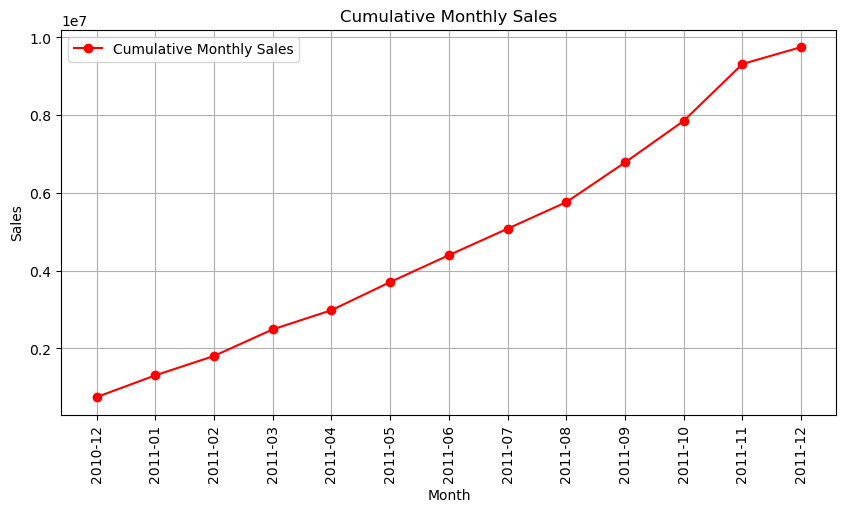

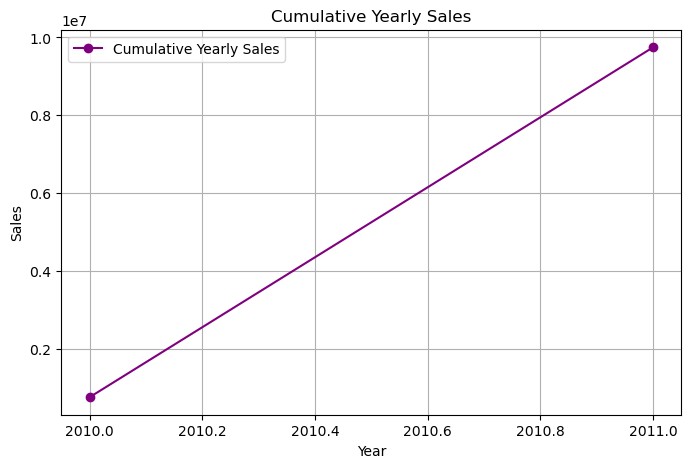

In [ ]:
monthly_sales_sorted = sorted(monthly_sales.items())
yearly_sales_sorted = sorted(yearly_sales.items())

months, monthly_cumsum = zip(*[(f"{year}-{month:02d}", sum([val for (y, m), val in monthly_sales_sorted if (y < year) or (y == year and m <= month)])) for year, month in dict(monthly_sales_sorted).keys()])
years, yearly_cumsum = zip(*[(year, sum([val for y, val in yearly_sales_sorted if y <= year])) for year in dict(yearly_sales_sorted).keys()])

plt.figure(figsize=(10, 5))
plt.plot(months, monthly_cumsum, marker='o', linestyle='-', color='red', label='Cumulative Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.legend()
plt.title('Cumulative Monthly Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(years, yearly_cumsum, marker='o', linestyle='-', color='purple', label='Cumulative Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.title('Cumulative Yearly Sales')
plt.grid(True)
plt.show()